In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
(df.isnull().sum()/len(df)*100)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [10]:
df.dropna(inplace=True,axis=0)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


<Axes: xlabel='TotalCharges'>

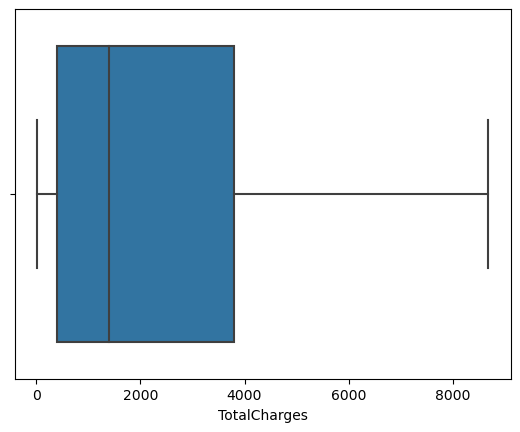

In [12]:
sns.boxplot(x=df['TotalCharges'])

<Axes: xlabel='tenure'>

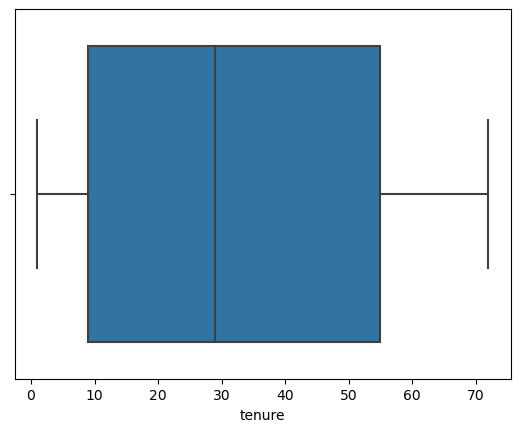

In [13]:
sns.boxplot(x=df['tenure'])


<Axes: xlabel='MonthlyCharges'>

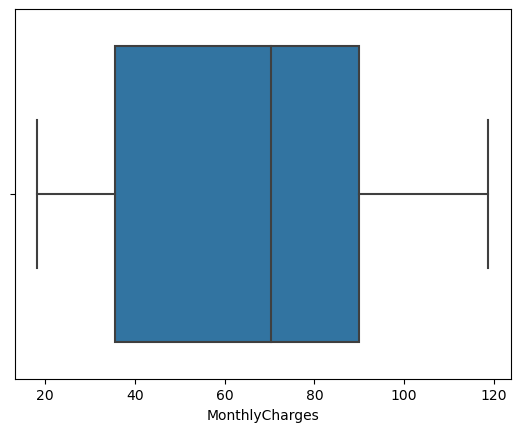

In [14]:
sns.boxplot(x=df['MonthlyCharges'])


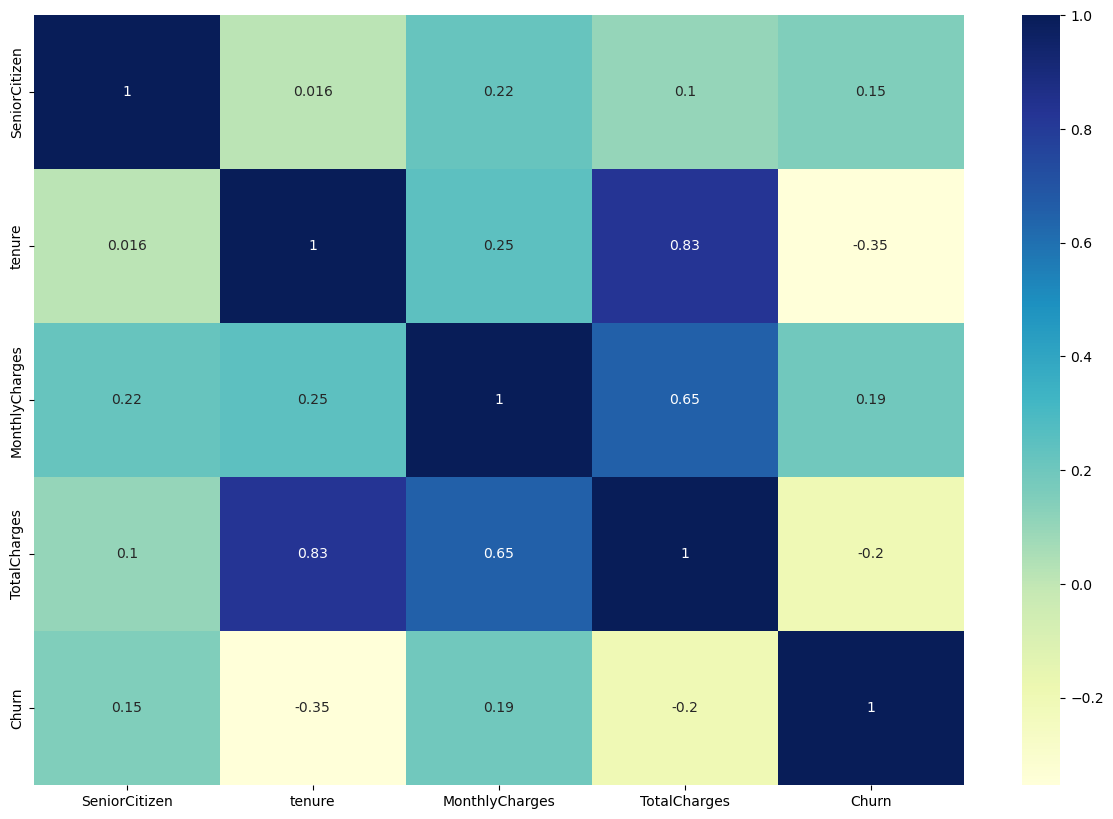

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

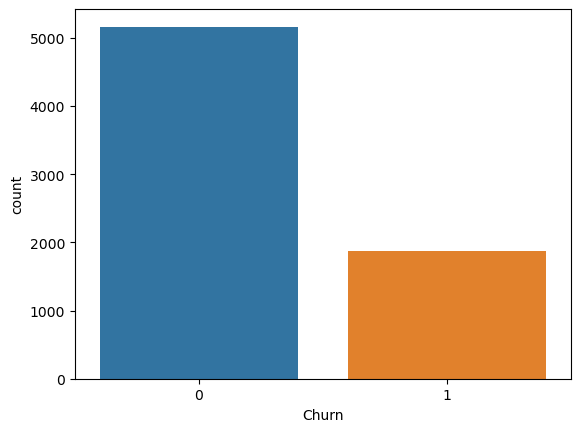

In [16]:
# count plot on single categorical variable
sns.countplot(x ='Churn', data = df)
 
# Show the plot
plt.show()

In [17]:
# Churn is not balanced

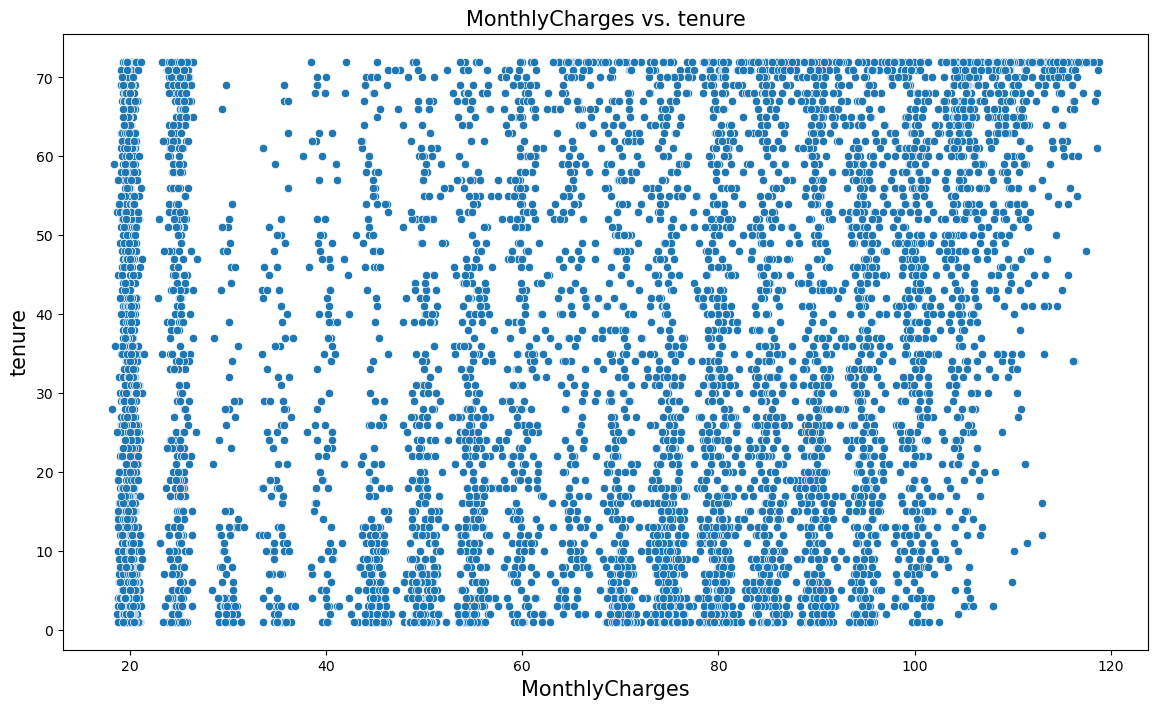

In [18]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df, x="MonthlyCharges", y="tenure", ax = ax)
plt.title("MonthlyCharges vs. tenure", size=15)
plt.xlabel("MonthlyCharges", size=15)
plt.ylabel(("tenure"), size=15)
plt.show()

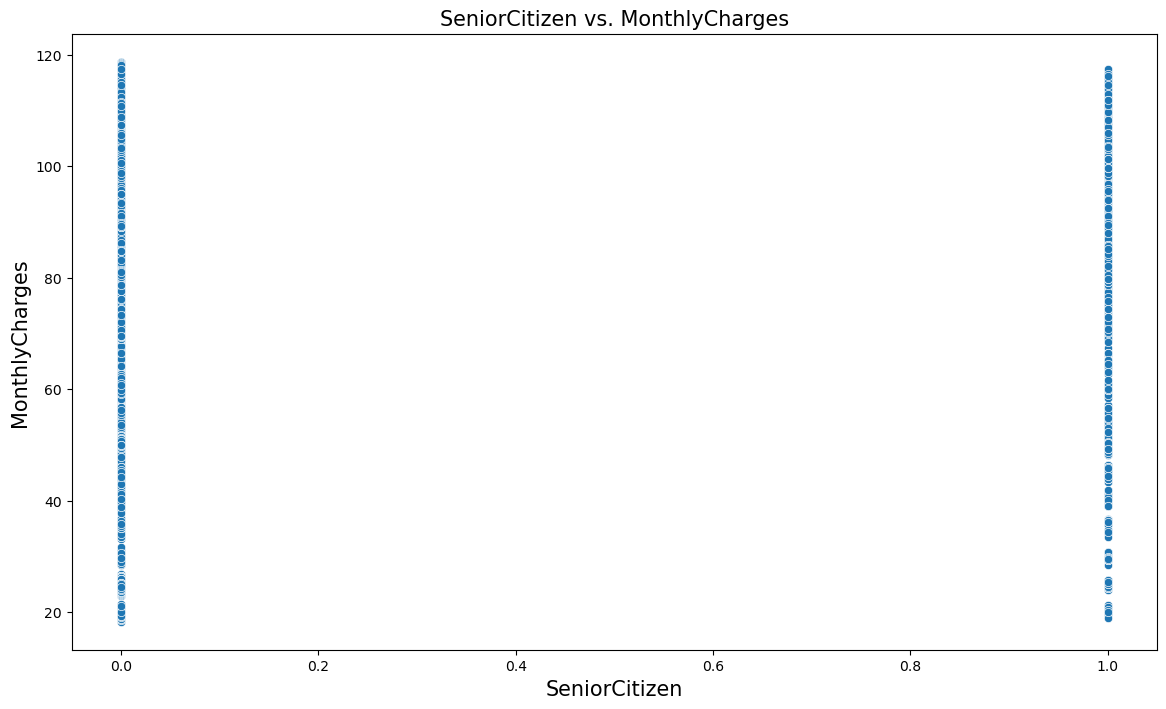

In [19]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df, x="SeniorCitizen", y="MonthlyCharges", ax = ax)
plt.title("SeniorCitizen vs. MonthlyCharges", size=15)
plt.xlabel("SeniorCitizen", size=15)
plt.ylabel(("MonthlyCharges"), size=15)
plt.show()

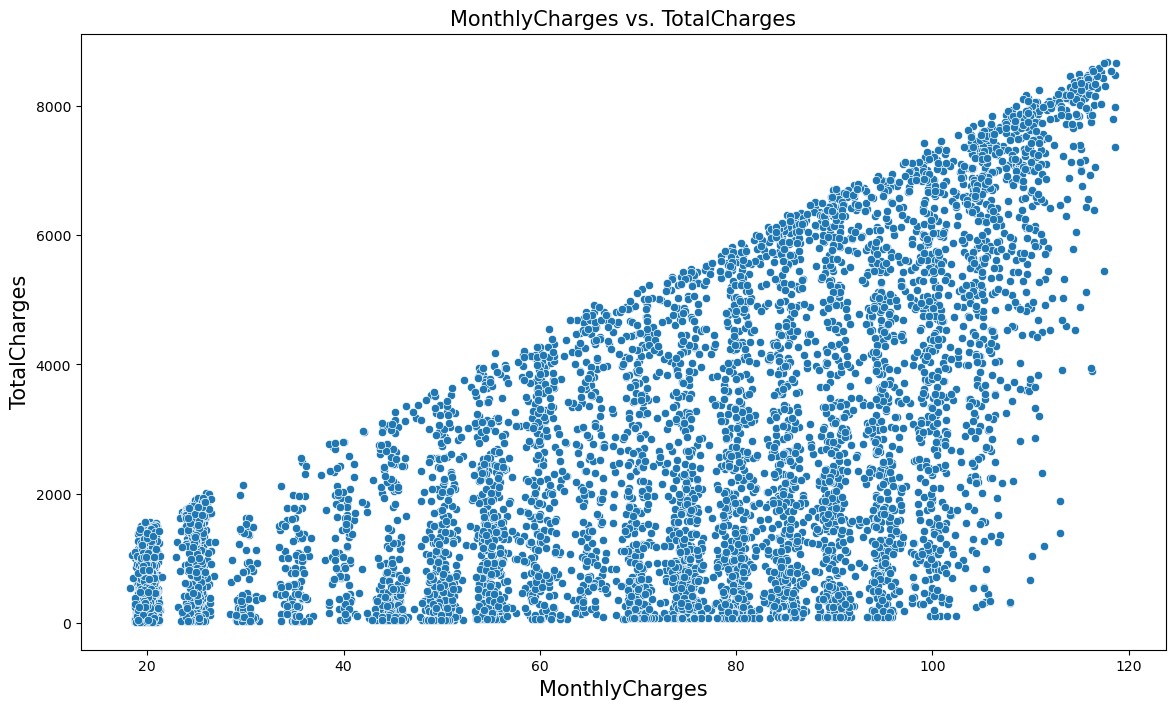

In [20]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", ax = ax)
plt.title("MonthlyCharges vs. TotalCharges", size=15)
plt.xlabel("MonthlyCharges", size=15)
plt.ylabel(("TotalCharges"), size=15)
plt.show()

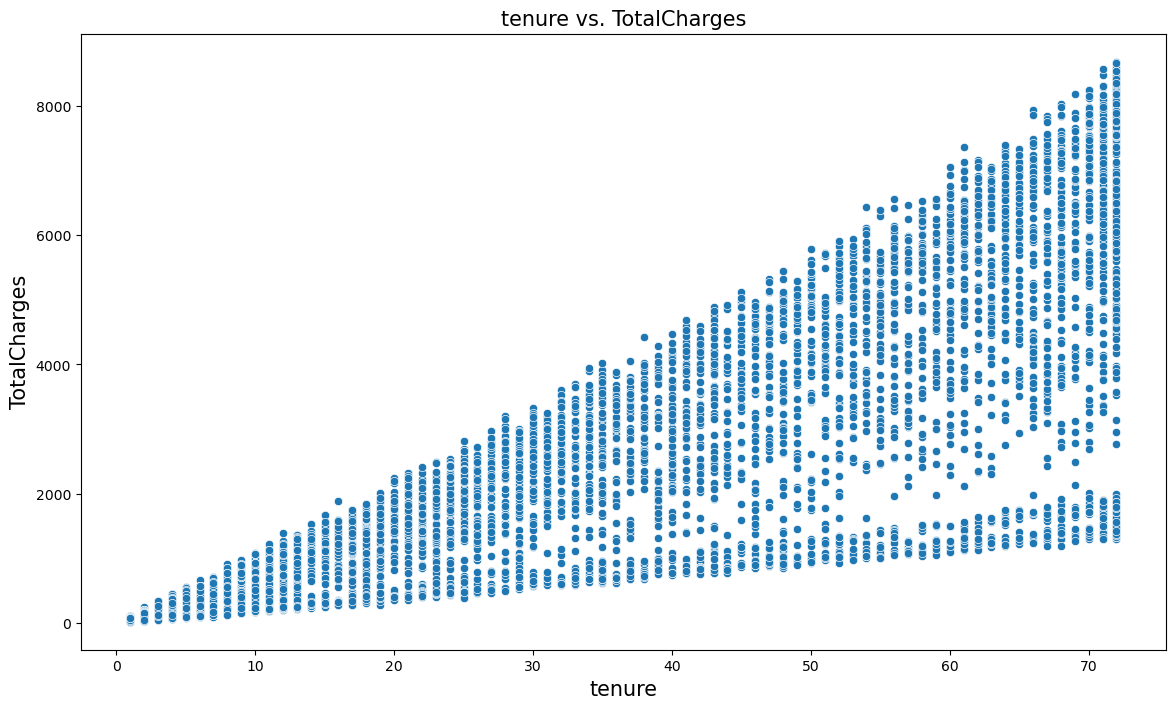

In [21]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df, x="tenure", y="TotalCharges", ax = ax)
plt.title("tenure vs. TotalCharges", size=15)
plt.xlabel("tenure", size=15)
plt.ylabel(("TotalCharges"), size=15)
plt.show()

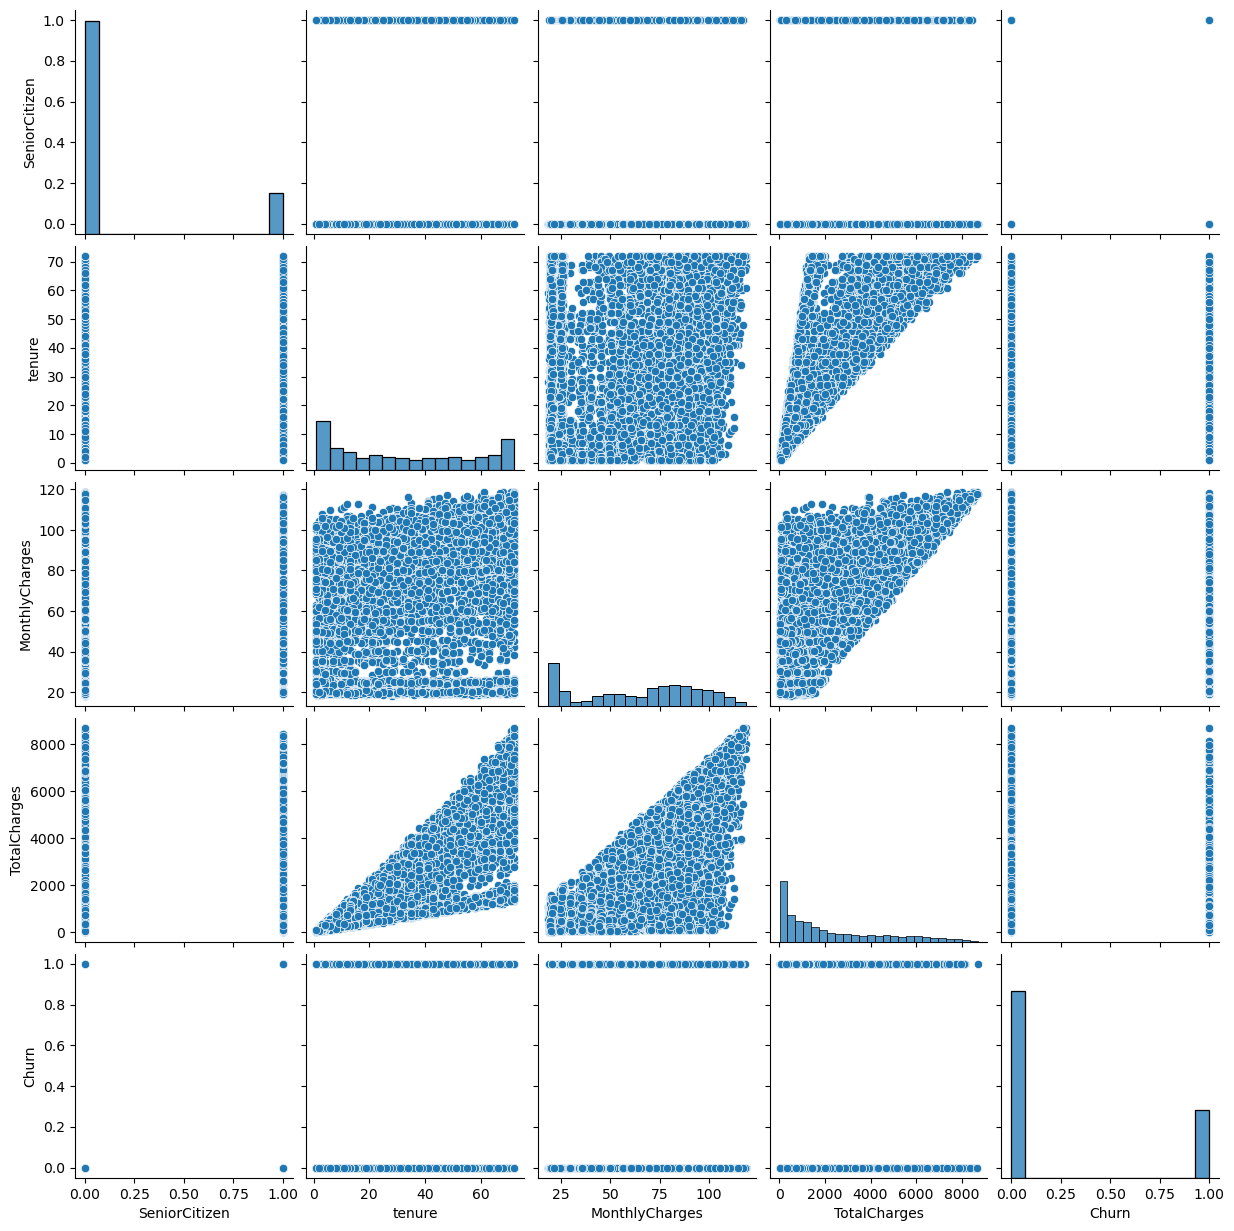

In [22]:
sns.pairplot(df)

In [23]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [24]:
df.gender.nunique(),df.Partner.nunique(),df.Dependents.nunique(),df.PhoneService.nunique(),df.MultipleLines.nunique(),df.InternetService.nunique(),df.OnlineSecurity.nunique(),df.OnlineBackup.nunique(),df.DeviceProtection.nunique(),

(2, 2, 2, 2, 3, 3, 3, 3, 3)

In [25]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [27]:
df = df.drop('customerID',axis=1)

In [28]:
df1 = df

In [29]:
df1.to_csv("data.csv",index=False)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [31]:
df_cat = df.select_dtypes("object")

In [32]:
for i in df_cat:
    df[i]=oe.fit_transform(df[[i]])

In [33]:
df.shape

(7032, 20)

In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3946,0.0,0,0.0,0.0,9,0.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,3.0,58.50,539.85
3394,1.0,0,0.0,0.0,26,1.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,61.55,1581.95
1635,0.0,0,0.0,0.0,3,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,2.0,69.95,220.45
4088,1.0,0,0.0,0.0,7,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,73.60,520.00
1886,1.0,0,1.0,1.0,67,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,60.40,3953.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1.0,0,0.0,0.0,3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.40,137.25
5199,0.0,0,0.0,0.0,51,1.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,111.50,5703.25
5235,1.0,0,0.0,0.0,9,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,81.15,784.45
5399,0.0,0,0.0,0.0,50,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,19.75,989.05


In [38]:
y_train

3946    1
3394    0
1635    0
4088    1
1886    0
       ..
3778    0
5199    0
5235    0
5399    0
862     1
Name: Churn, Length: 4922, dtype: int64

In [39]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

In [41]:
import pickle
scale = open('scaler.pkl','wb')
pickle.dump(scaler, scale)

# Logestic Regression

In [42]:
lr = LogisticRegression()

In [43]:
model_lr = lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.91%


In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))  

[[1385  164]
 [ 260  301]]


Text(0.5, 1.0, 'Confusion Matrix')

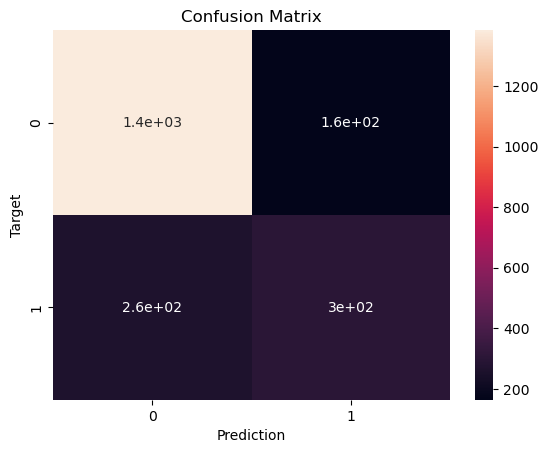

In [46]:
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [47]:
class_re=classification_report(y_test,y_pred)


In [48]:
print("classification_report\n\n")
print(class_re)


classification_report


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [49]:
tr = model_lr.score(X_train, y_train)*100
ts = model_lr.score(X_test, y_test)*100

In [50]:
print('training_accuracy',round(tr,2))
print('testing_accuracy',round(ts,2))

training_accuracy 80.41
testing_accuracy 79.91


In [51]:
from sklearn.metrics import f1_score

In [52]:
f1_score = f1_score(y_test,y_pred)

In [53]:
round(f1_score,2)

0.59

# Random Forest

In [54]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, prediction_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.57%


In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction_test))  

[[1419  130]
 [ 301  260]]


Text(0.5, 1.0, 'Confusion Matrix')

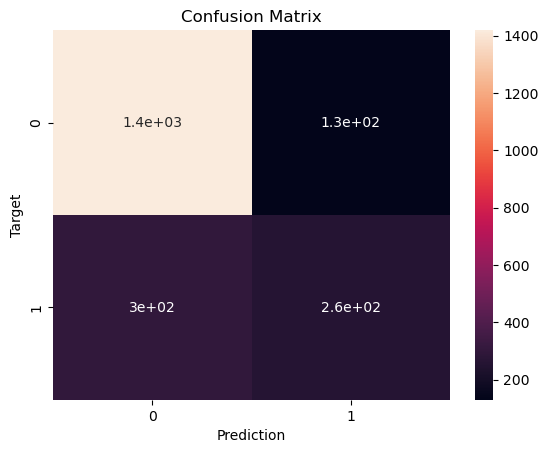

In [56]:
cf = confusion_matrix(y_test, prediction_test)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [57]:
class_re_rf=classification_report(y_test,prediction_test)
print("classification_report_RandomForest\n\n")
print(class_re_rf)


classification_report_RandomForest


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.67      0.46      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



# SVM

In [58]:
from sklearn.svm import SVC
model = SVC()
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.72%


In [59]:
# Create the Confusion matrix
print(confusion_matrix(y_test,preds))  

[[1370  179]
 [ 270  291]]


Text(0.5, 1.0, 'Confusion Matrix')

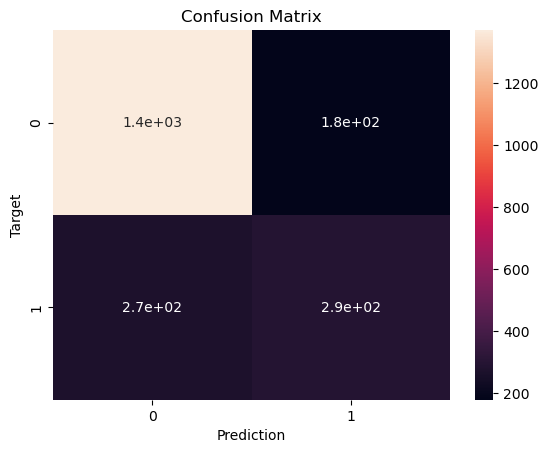

In [60]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, preds)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [61]:
class_re_svc=classification_report(y_test,preds)
print("classification_report_SVC\n\n")
print(class_re_svc)


classification_report_SVC


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.62      0.52      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



# ADA Boost

In [62]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
ada_preds = model.predict(X_test)
accuracy = accuracy_score(y_test, ada_preds)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.48%


In [63]:
# Create the Confusion matrix
print(confusion_matrix(y_test,ada_preds))  

[[1375  174]
 [ 259  302]]


In [64]:
class_re_ada=classification_report(y_test,ada_preds)
print("classification_report_ADA_Boost\n\n")
print(class_re_ada)


classification_report_ADA_Boost


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



In [65]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
XG_preds = model.predict(X_test)
accuracy = accuracy_score(y_test, XG_preds)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.63%


In [66]:
# Create the Confusion matrix
print(confusion_matrix(y_test,XG_preds))  

[[1361  188]
 [ 284  277]]


In [67]:
class_re_ada=classification_report(y_test,XG_preds)
print("classification_report_ADA_Boost\n\n")
print(class_re_ada)


classification_report_ADA_Boost


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.49      0.54       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



# Evaluating

In [68]:
new_df = pd.read_csv('test.csv')

In [69]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [70]:
new_df.shape

(20, 19)

In [71]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20 non-null     object 
 1   SeniorCitizen     20 non-null     int64  
 2   Partner           20 non-null     object 
 3   Dependents        20 non-null     object 
 4   tenure            20 non-null     int64  
 5   PhoneService      20 non-null     object 
 6   MultipleLines     20 non-null     object 
 7   InternetService   20 non-null     object 
 8   OnlineSecurity    20 non-null     object 
 9   OnlineBackup      20 non-null     object 
 10  DeviceProtection  20 non-null     object 
 11  TechSupport       20 non-null     object 
 12  StreamingTV       20 non-null     object 
 13  StreamingMovies   20 non-null     object 
 14  Contract          20 non-null     object 
 15  PaperlessBilling  20 non-null     object 
 16  PaymentMethod     20 non-null     object 
 17 

In [72]:
new_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

# Test model on new data

In [73]:
new_df_cat = new_df.select_dtypes("object")

In [74]:
for i in new_df_cat:
    new_df[i]=oe.fit_transform(new_df[[i]])

In [75]:
import pickle
# open a file, where you want to store the data
# dump infile = open('logistic_regression_model.pkl', 'wb')formation to that file
pickle.dump(model_lr, open('logistic_regression_model.pkl', 'wb'))

In [76]:
pred_model = pickle.load(open('logistic_regression_model.pkl','rb'))

In [77]:
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,0,0.0,0.0,25,1.0,0.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,0.0,1.0,2.0,106.00,2787.00
1,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,30.00,30.00
2,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
3,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
4,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
5,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
6,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
7,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
8,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65
9,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50


In [78]:
## Prediction
pred_model.predict(scaler.transform(new_df))



array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [79]:
import pickle
pickle.dump(model_lr, open('model.pkl', 'wb'))

In [80]:
#label = open('label_encoder.pkl','wb')
#pickle.dump(oe, label)